# Credit Card Risk prediction

### In this lesson, we will analyze people who have credit cards and develop a model to find people who have the potential to get a credit card in the future

<img src=https://pcibooking.net/wp-content/uploads/2018/11/pci_risk_assessment_cc_risk.png width='400'>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",100)

In [2]:
df=pd.read_csv('train_data.csv')

In [3]:
df2=pd.read_csv('test_data.csv')

In [4]:
df.head()

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
0,5037048,M,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,With parents,-16271,-3111,1,0,0,0,Core staff,2.0,-17.0,0
1,5044630,F,Y,N,1,135000.0,Commercial associate,Higher education,Single / not married,House / apartment,-10130,-1651,1,0,0,0,Accountants,2.0,-1.0,0
2,5079079,F,N,Y,2,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-12821,-5657,1,0,0,0,Laborers,4.0,-38.0,0
3,5112872,F,Y,Y,0,360000.0,Commercial associate,Higher education,Single / not married,House / apartment,-20929,-2046,1,0,0,1,Managers,1.0,-11.0,0
4,5105858,F,N,N,0,270000.0,Working,Secondary / secondary special,Separated,House / apartment,-16207,-515,1,0,1,0,NaN,1.0,-41.0,0


In [5]:
df.shape

(29165, 20)

In [6]:
df2.head()

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
0,5091261,F,N,Y,0,202500.0,State servant,Secondary / secondary special,Separated,House / apartment,-16834,-1692,1,0,0,0,Medicine staff,1.0,-6.0,0
1,5096963,M,Y,N,0,675000.0,Commercial associate,Higher education,Married,House / apartment,-18126,-948,1,0,1,0,Managers,2.0,-16.0,0
2,5087880,F,N,N,0,234000.0,State servant,Higher education,Civil marriage,House / apartment,-21967,-5215,1,0,0,1,Core staff,2.0,-52.0,0
3,5021949,F,Y,Y,0,445500.0,Commercial associate,Higher education,Married,House / apartment,-12477,-456,1,0,0,0,Managers,2.0,-54.0,0
4,5105705,F,Y,N,0,225000.0,Working,Secondary / secondary special,Married,Municipal apartment,-12155,-667,1,0,0,0,Laborers,2.0,-48.0,0


In [7]:
df2.shape

(7292, 20)

In [8]:
df=pd.concat([df,df2])

In [9]:
df.shape

(36457, 20)

In [10]:
df.columns

Index(['ID', 'Gender', 'Has a car', 'Has a property', 'Children count',
       'Income', 'Employment status', 'Education level', 'Marital status',
       'Dwelling', 'Age', 'Employment length', 'Has a mobile phone',
       'Has a work phone', 'Has a phone', 'Has an email', 'Job title',
       'Family member count', 'Account age', 'Is high risk'],
      dtype='object')

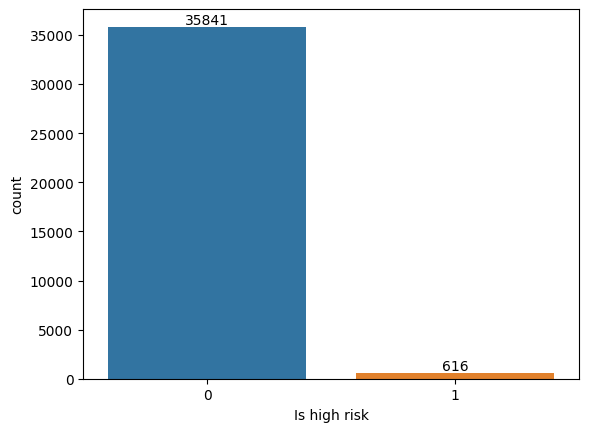

In [11]:
ax=sns.countplot(x=df['Is high risk'])
ax.bar_label(ax.containers[0]);

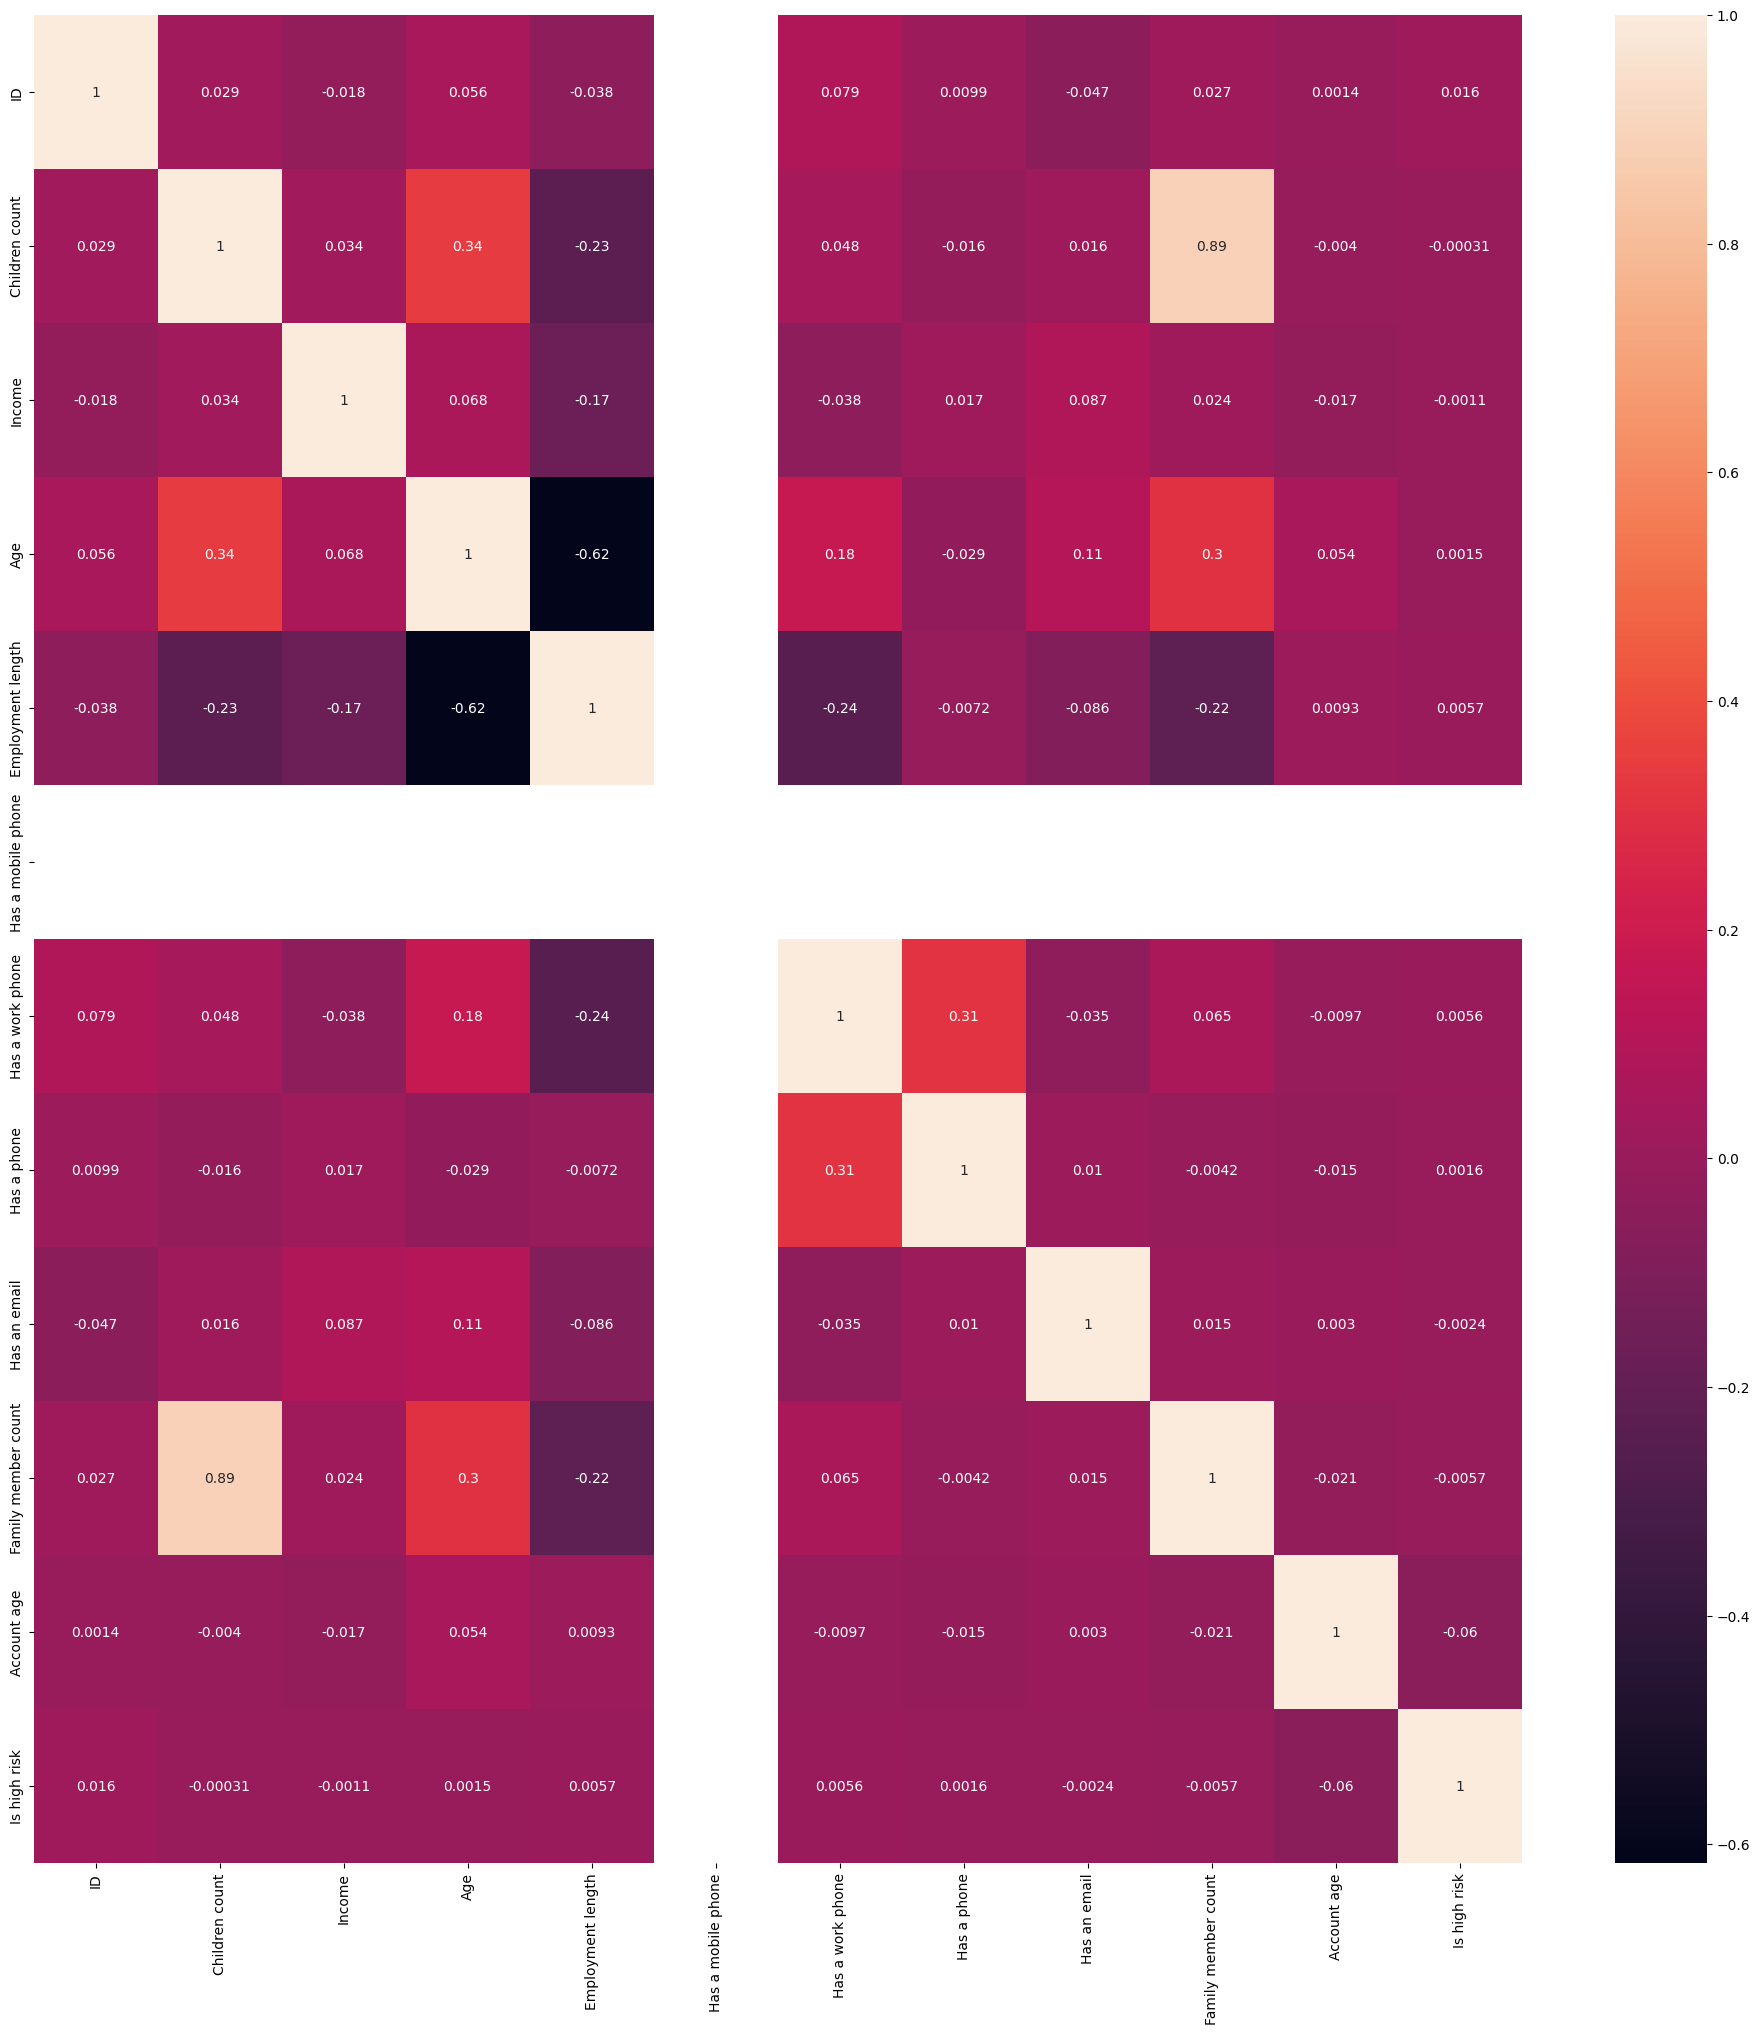

In [12]:
plt.figure(figsize=(24, 24))  
sns.heatmap(df.corr(numeric_only=True), annot=True)

plt.show()

In [13]:
abs(df.corr(numeric_only=True)['Is high risk'].sort_values(ascending=False))

Is high risk           1.000000
ID                     0.015588
Employment length      0.005664
Has a work phone       0.005640
Has a phone            0.001585
Age                    0.001478
Children count         0.000308
Income                 0.001057
Has an email           0.002434
Family member count    0.005660
Account age            0.060215
Has a mobile phone          NaN
Name: Is high risk, dtype: float64

In [14]:
df['Has a mobile phone'].value_counts()

Has a mobile phone
1    36457
Name: count, dtype: int64

In [15]:
df.isnull().sum()

ID                         0
Gender                     0
Has a car                  0
Has a property             0
Children count             0
Income                     0
Employment status          0
Education level            0
Marital status             0
Dwelling                   0
Age                        0
Employment length          0
Has a mobile phone         0
Has a work phone           0
Has a phone                0
Has an email               0
Job title              11323
Family member count        0
Account age                0
Is high risk               0
dtype: int64

In [16]:
df['Job title'].value_counts()

Job title
Laborers                 6211
Core staff               3591
Sales staff              3485
Managers                 3012
Drivers                  2138
High skill tech staff    1383
Accountants              1241
Medicine staff           1207
Cooking staff             655
Security staff            592
Cleaning staff            551
Private service staff     344
Low-skill Laborers        175
Waiters/barmen staff      174
Secretaries               151
HR staff                   85
Realty agents              79
IT staff                   60
Name: count, dtype: int64

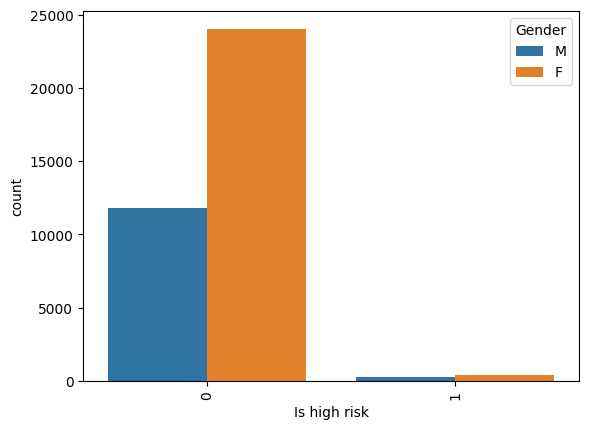

In [17]:
sns.countplot(x=df['Is high risk'],hue=df.Gender)
plt.xticks(rotation=90);

In [18]:
df=df.drop(['Job title','ID','Has a mobile phone'],axis=1)

In [19]:
df.head()

,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a work phone,Has a phone,Has an email,Family member count,Account age,Is high risk
0,M,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,With parents,-16271,-3111,0,0,0,2.0,-17.0,0
1,F,Y,N,1,135000.0,Commercial associate,Higher education,Single / not married,House / apartment,-10130,-1651,0,0,0,2.0,-1.0,0
2,F,N,Y,2,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-12821,-5657,0,0,0,4.0,-38.0,0
3,F,Y,Y,0,360000.0,Commercial associate,Higher education,Single / not married,House / apartment,-20929,-2046,0,0,1,1.0,-11.0,0
4,F,N,N,0,270000.0,Working,Secondary / secondary special,Separated,House / apartment,-16207,-515,0,1,0,1.0,-41.0,0


In [20]:
df.columns

Index(['Gender', 'Has a car', 'Has a property', 'Children count', 'Income',
       'Employment status', 'Education level', 'Marital status', 'Dwelling',
       'Age', 'Employment length', 'Has a work phone', 'Has a phone',
       'Has an email', 'Family member count', 'Account age', 'Is high risk'],
      dtype='object')

In [21]:
df['Dwelling'].value_counts()

Dwelling
House / apartment      32548
With parents            1776
Municipal apartment     1128
Rented apartment         575
Office apartment         262
Co-op apartment          168
Name: count, dtype: int64

In [22]:
e={'N': 0, 'Y': 1,}

In [23]:
df['Has a car']=df['Has a car'].map(e)

In [24]:
df['Has a property']=df['Has a property'].map(e)

In [25]:
df.head()

,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a work phone,Has a phone,Has an email,Family member count,Account age,Is high risk
0,M,1,1,0,135000.0,Working,Secondary / secondary special,Married,With parents,-16271,-3111,0,0,0,2.0,-17.0,0
1,F,1,0,1,135000.0,Commercial associate,Higher education,Single / not married,House / apartment,-10130,-1651,0,0,0,2.0,-1.0,0
2,F,0,1,2,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-12821,-5657,0,0,0,4.0,-38.0,0
3,F,1,1,0,360000.0,Commercial associate,Higher education,Single / not married,House / apartment,-20929,-2046,0,0,1,1.0,-11.0,0
4,F,0,0,0,270000.0,Working,Secondary / secondary special,Separated,House / apartment,-16207,-515,0,1,0,1.0,-41.0,0


In [26]:
df=pd.get_dummies(df,drop_first=True)

In [27]:
df.head()

,Has a car,Has a property,Children count,Income,Age,Employment length,Has a work phone,Has a phone,Has an email,Family member count,Account age,Is high risk,Gender_M,Employment status_Pensioner,Employment status_State servant,Employment status_Student,Employment status_Working,Education level_Higher education,Education level_Incomplete higher,Education level_Lower secondary,Education level_Secondary / secondary special,Marital status_Married,Marital status_Separated,Marital status_Single / not married,Marital status_Widow,Dwelling_House / apartment,Dwelling_Municipal apartment,Dwelling_Office apartment,Dwelling_Rented apartment,Dwelling_With parents
0,1,1,0,135000.0,-16271,-3111,0,0,0,2.0,-17.0,0,True,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,True
1,1,0,1,135000.0,-10130,-1651,0,0,0,2.0,-1.0,0,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False
2,0,1,2,180000.0,-12821,-5657,0,0,0,4.0,-38.0,0,False,False,False,False,False,False,False,False,True,True,False,False,False,True,False,False,False,False
3,1,1,0,360000.0,-20929,-2046,0,0,1,1.0,-11.0,0,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False
4,0,0,0,270000.0,-16207,-515,0,1,0,1.0,-41.0,0,False,False,False,False,True,False,False,False,True,False,True,False,False,True,False,False,False,False


In [28]:
x=df.drop('Is high risk',axis=1)
y=df[['Is high risk']]

In [29]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D, InputLayer, Reshape, MaxPooling2D, Flatten,Dropout, BatchNormalization
from sklearn.model_selection import train_test_split

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [32]:
model=Sequential()

model.add(Dense(18,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(4,activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [33]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=45, verbose=1)

Epoch 1/45
912/912 ━━━━━━━━━━━━━━━━━━━━ 1s 526us/step - accuracy: 0.9822 - loss: 0.1702 - val_accuracy: 0.9851 - val_loss: 0.0881
Epoch 2/45
912/912 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step - accuracy: 0.9821 - loss: 0.0945 - val_accuracy: 0.9851 - val_loss: 0.0814
Epoch 3/45
912/912 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step - accuracy: 0.9822 - loss: 0.0945 - val_accuracy: 0.9851 - val_loss: 0.0808
Epoch 4/45
912/912 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step - accuracy: 0.9828 - loss: 0.0896 - val_accuracy: 0.9851 - val_loss: 0.0799
Epoch 5/45
912/912 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step - accuracy: 0.9824 - loss: 0.0908 - val_accuracy: 0.9851 - val_loss: 0.0802
Epoch 6/45
912/912 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step - accuracy: 0.9827 - loss: 0.0884 - val_accuracy: 0.9851 - val_loss: 0.0798
Epoch 7/45
912/912 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - accuracy: 0.9826 - loss: 0.0896 - val_accuracy: 0.9851 - val_loss: 0.0795
Epoch 8/45
912/912 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - accuracy: 0.9820 - loss: 0.0910 - 

In [34]:
loss,accuracy=model.evaluate(x_test,y_test)

228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 252us/step - accuracy: 0.9862 - loss: 0.0730


In [35]:
accuracy

0.9850521087646484

In [36]:
tahmin=model.predict(x_test)

228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step


In [37]:
model.save('Kredi.h5')

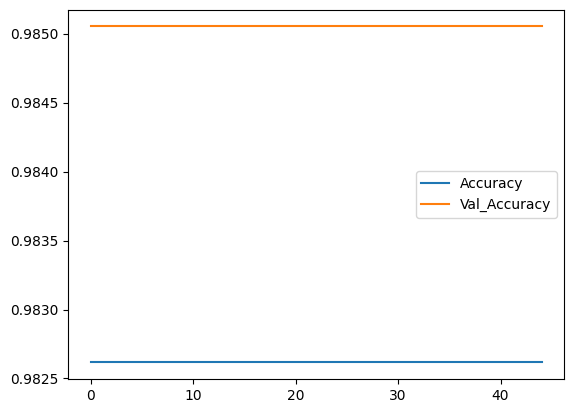

In [38]:
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'],label='Val_Accuracy')
plt.legend();

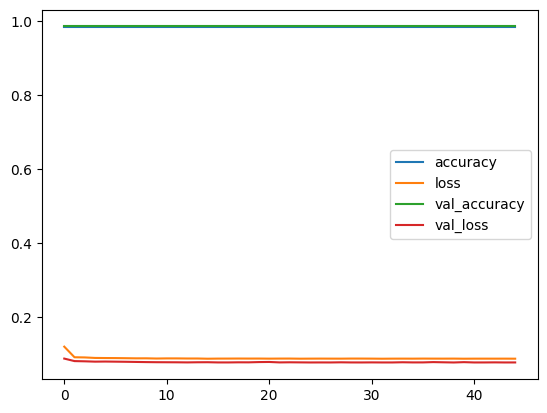

In [39]:
loss_f=pd.DataFrame(history.history)
loss_f.plot();

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [41]:
confusion_matrix(y_test, np.argmax(tahmin, axis=1))

array([[7183,    0],
       [ 109,    0]])

In [42]:
cm=confusion_matrix(y_test, np.argmax(tahmin, axis=1))

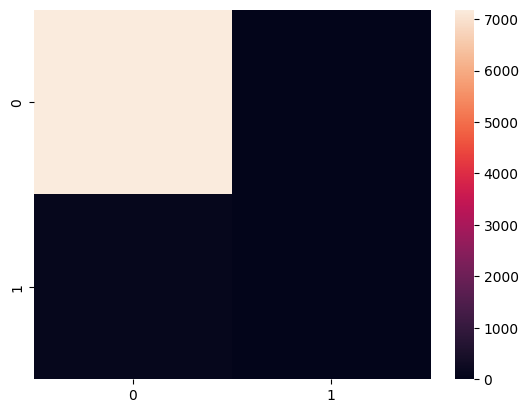

In [43]:

from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, np.argmax(tahmin, axis=1)), annot=False);

In [44]:
print(classification_report(y_test, np.argmax(tahmin, axis=1)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7183
           1       0.00      0.00      0.00       109

    accuracy                           0.99      7292
   macro avg       0.49      0.50      0.50      7292
weighted avg       0.97      0.99      0.98      7292



# accuracy: 0.9862 - loss: 0.0730
# Using this model, it is possible to see who is not given a credit card